In [11]:
import os
os.chdir('#')
import models.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from models.models import ConvolutionalNeuralNetwork
import models.activations as activations
import training.optimizers as optimizers
import training.loss as losses
import utils.metrics as metrics
# np.random.seed(21)

In [12]:
import utils.dataset as dt

# Cargar dataset
[train, test] = dt.load_dataset('data/mnist')
x_train, y_train, x_val, y_val, x_test, y_test = dt.preprocess_dataset(train_data=train, test_data=test)


    Train data: (48000, 1, 28, 28)
    Valid data: (12000, 1, 28, 28)
    Test data: (10000, 1, 28, 28)

    Train labels: (48000, 10)
    Valid labels: (12000, 10)
    Test labels: (10000, 10)
    


In [17]:
model = ConvolutionalNeuralNetwork(
    layers=[
        layers.Conv2D(input_shape=(32, 1, 28, 28), filters=4, filter_size=3, activation=activations.ReLU()),#, weights=weights_conv),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(neurons=32, activation=activations.ReLU()),
        layers.Dense(neurons=10, activation=activations.Softmax())#, weights=weights_dense)
    ], 
    optimizer=optimizers.SGD(learning_rate=0.02), 
    loss=losses.categorical_cross_entropy, 
    metrics=metrics.accuracy
)
model.summary()
batch = 3200
x = x_train[:batch, :, :, :]
y = y_train[:batch]
epochs = 10
batch_size = 32

Modelo de red neuronal con 6 capas:
- input: Entrada - (32, 1, 28, 28)
- conv: Conv2D - (32, 4, 26, 26) - 40 params
    Pesos:  (3, 3, 1, 4)
    Bias:  (4,)
- max_pooling: MaxPool2D - (32, 4, 13, 13)
- flatten: Flatten - (32, 676)
- dense: Dense - (32, 32) - 21664 params
    Pesos:  (676, 32)
    Bias:  (32,)
- dense: Dense - (32, 10) - 330 params
    Pesos:  (32, 10)
    Bias:  (10,)
Optimizador: SGD - Learning rate: 0.02
Función de pérdida: categorical_cross_entropy
Función de cálculo de métricas: accuracy
Cantidad de parámetros: 22034


In [18]:
model.evaluate(x[:32], y[:32])


(np.float64(0.168), np.float64(0.007))

In [19]:
loss, acc = model.train(x, y, epochs=epochs, batch_size=batch_size)

Entreando el modelo...
Epoch 1/10 - Loss: 0.0720 - Metric: 0.004
Epoch 2/10 - Loss: 0.0720 - Metric: 0.004
Epoch 3/10 - Loss: 0.0710 - Metric: 0.004
Epoch 4/10 - Loss: 0.0710 - Metric: 0.004
Epoch 5/10 - Loss: 0.0710 - Metric: 0.004
Epoch 6/10 - Loss: 0.0710 - Metric: 0.004
Epoch 7/10 - Loss: 0.0710 - Metric: 0.004
Epoch 8/10 - Loss: 0.0710 - Metric: 0.004
Epoch 9/10 - Loss: 0.0710 - Metric: 0.004
Epoch 10/10 - Loss: 0.0710 - Metric: 0.004


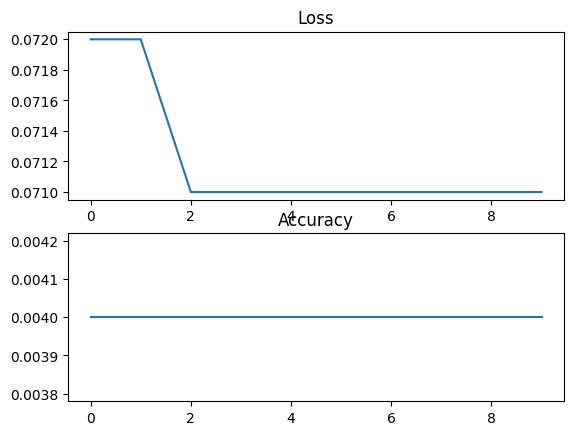

In [20]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(loss)
ax[0].set_title('Loss')
ax[1].plot(acc)
ax[1].set_title('Accuracy')
plt.show()